<a href="https://colab.research.google.com/github/kaisarfardin6620/Wine-Quality-Testing-/blob/main/wine_quality_testing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold


In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/WineQT.csv')

In [121]:
df.shape

(1143, 13)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [123]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [124]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597

In [125]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [126]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [127]:
df.duplicated().sum()

0

In [128]:
df.quality.value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

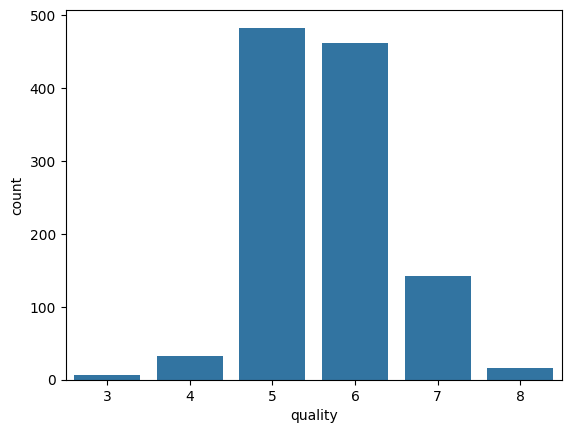

In [129]:
 sns.countplot(x='quality', data=df)

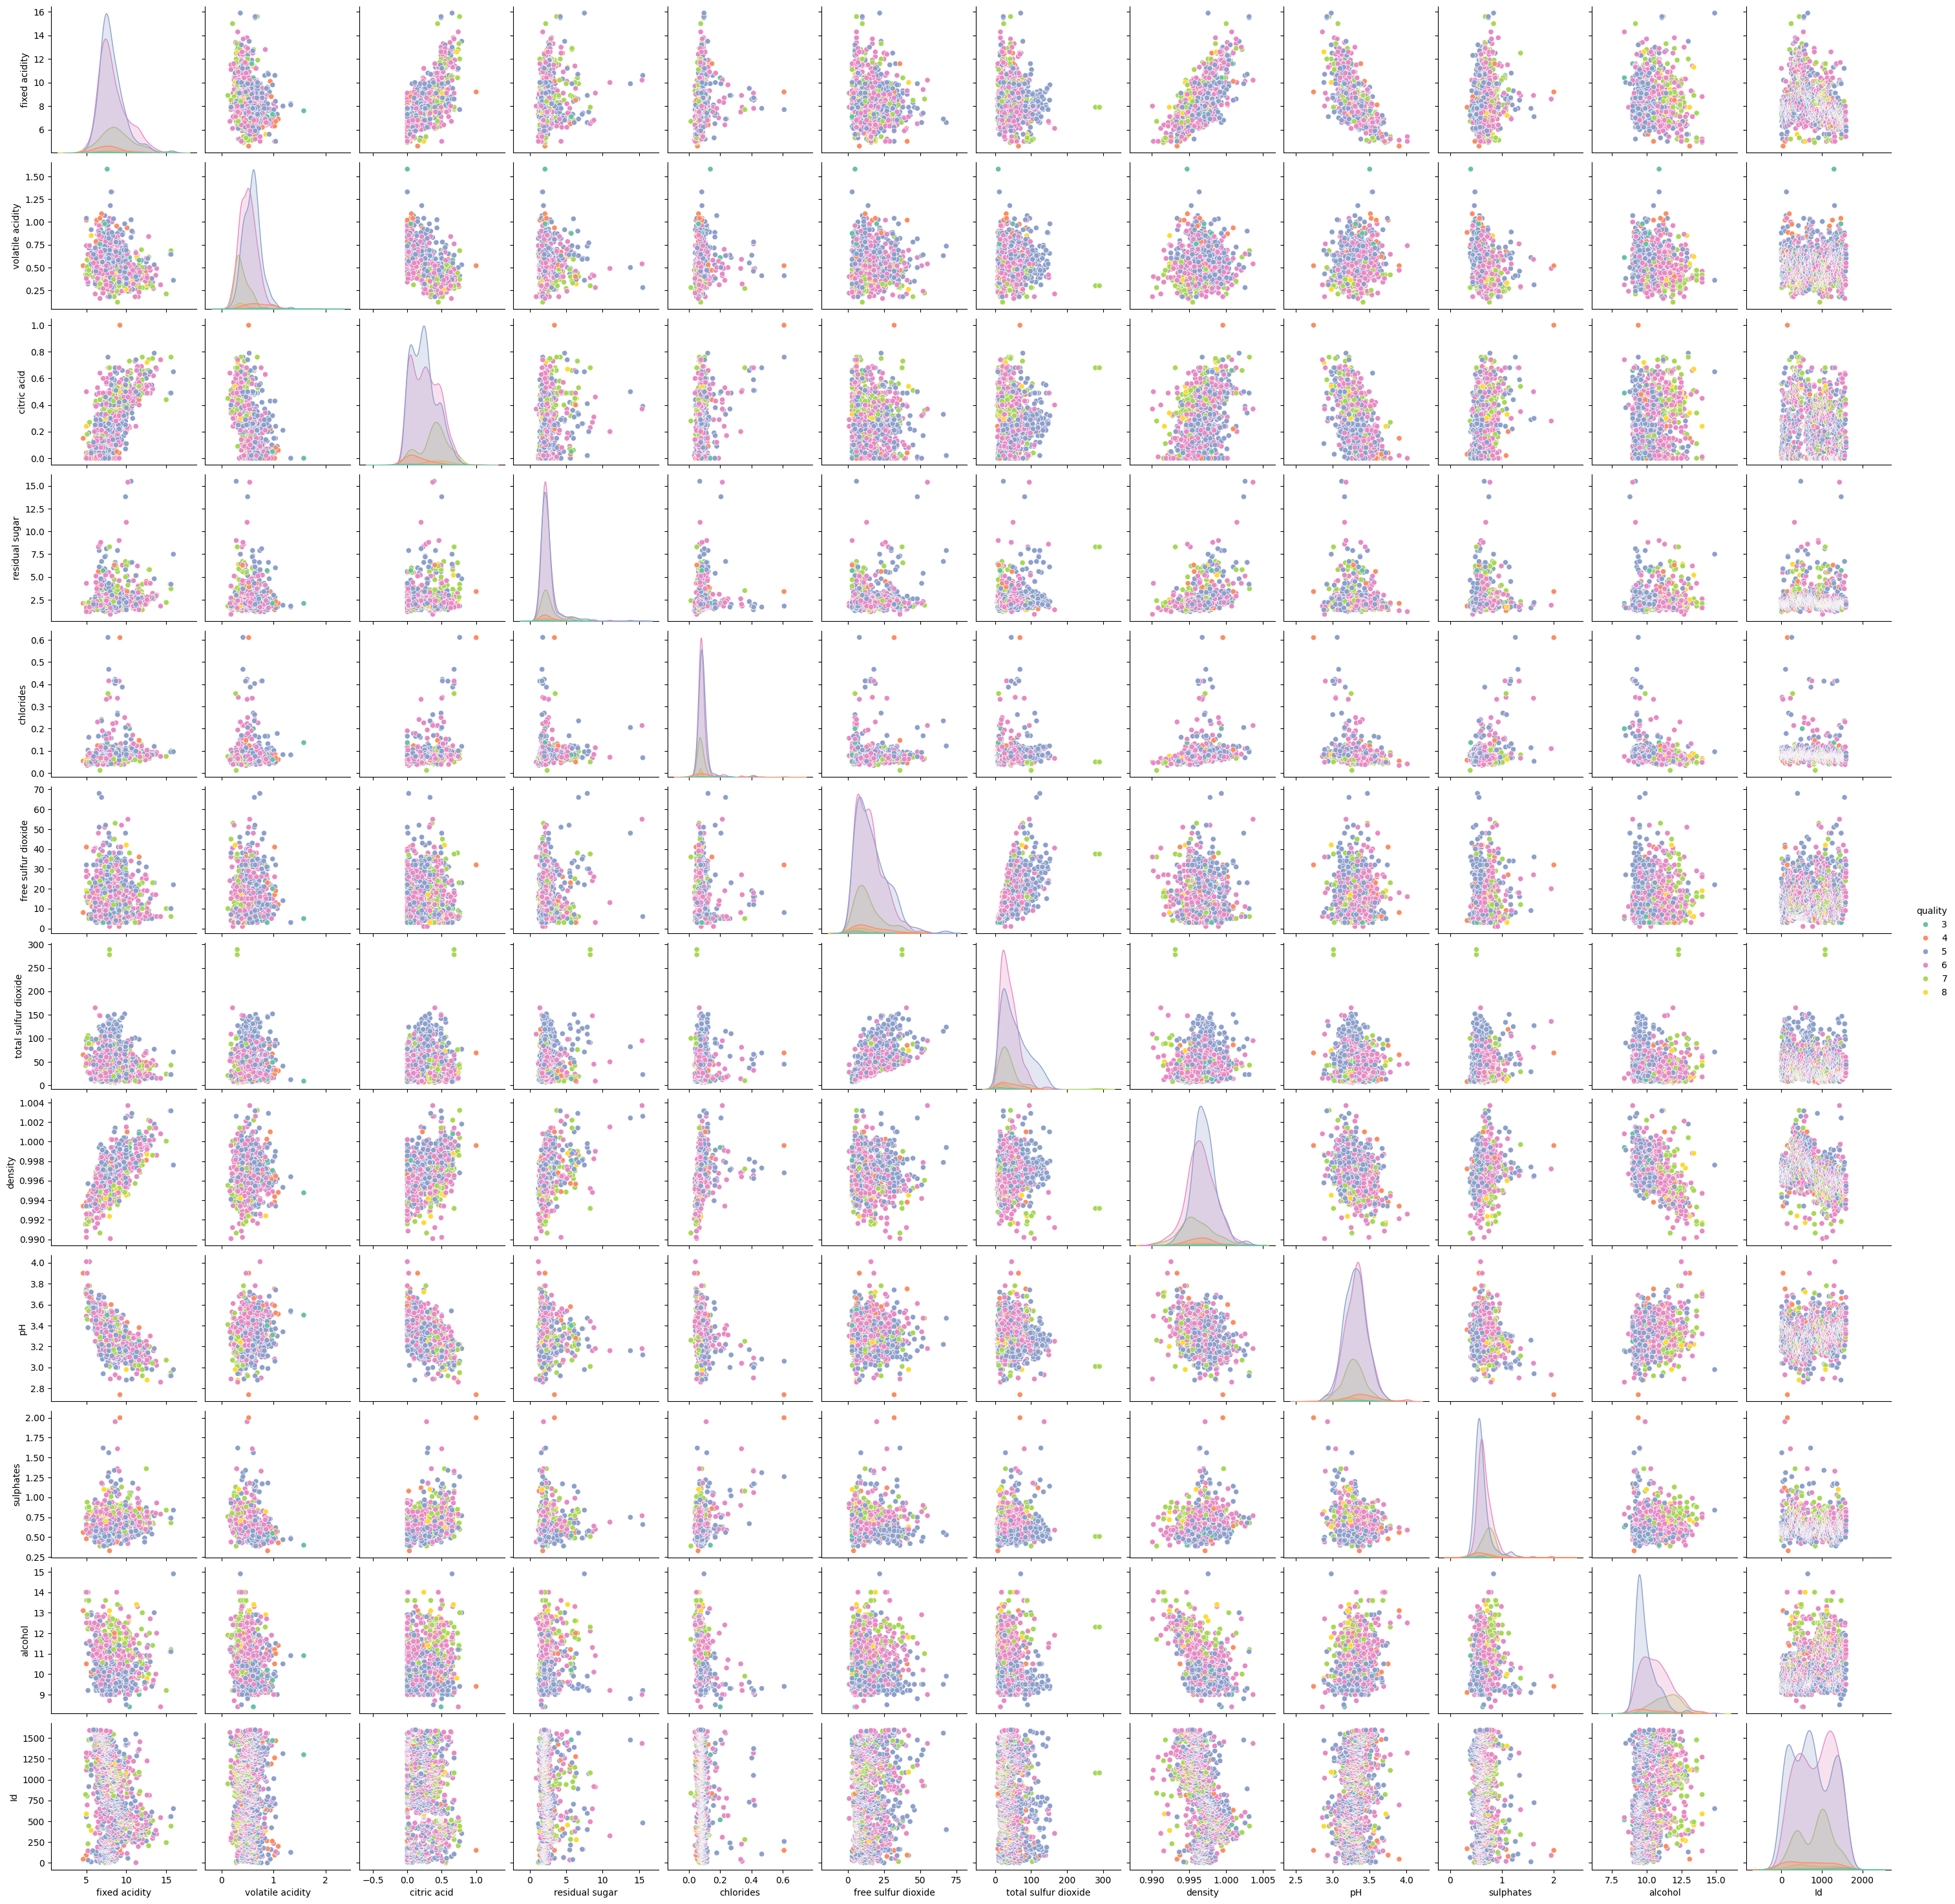

In [130]:
sns.pairplot(data=df, hue='quality', diag_kind="kde", palette="Set2")
plt.show()

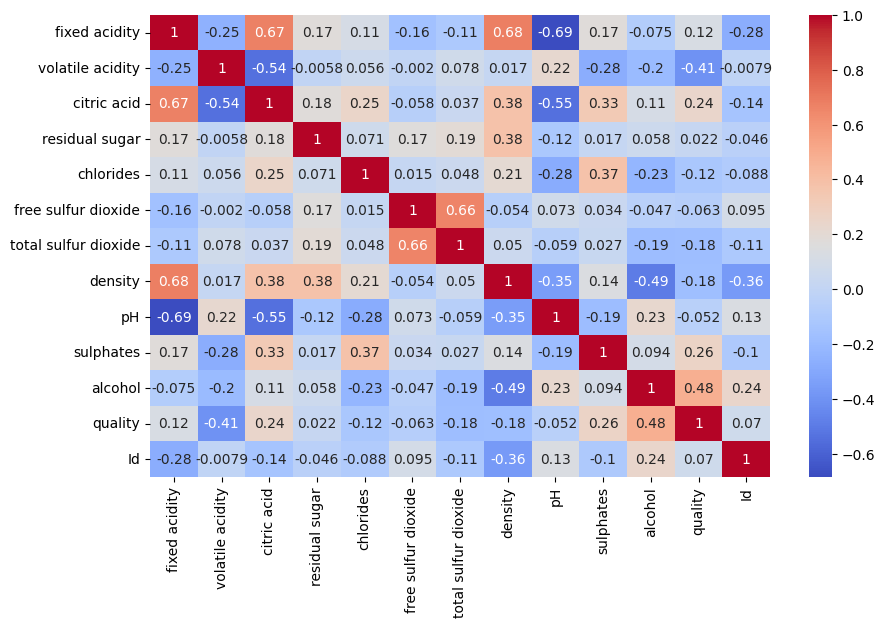

In [131]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

<Axes: >

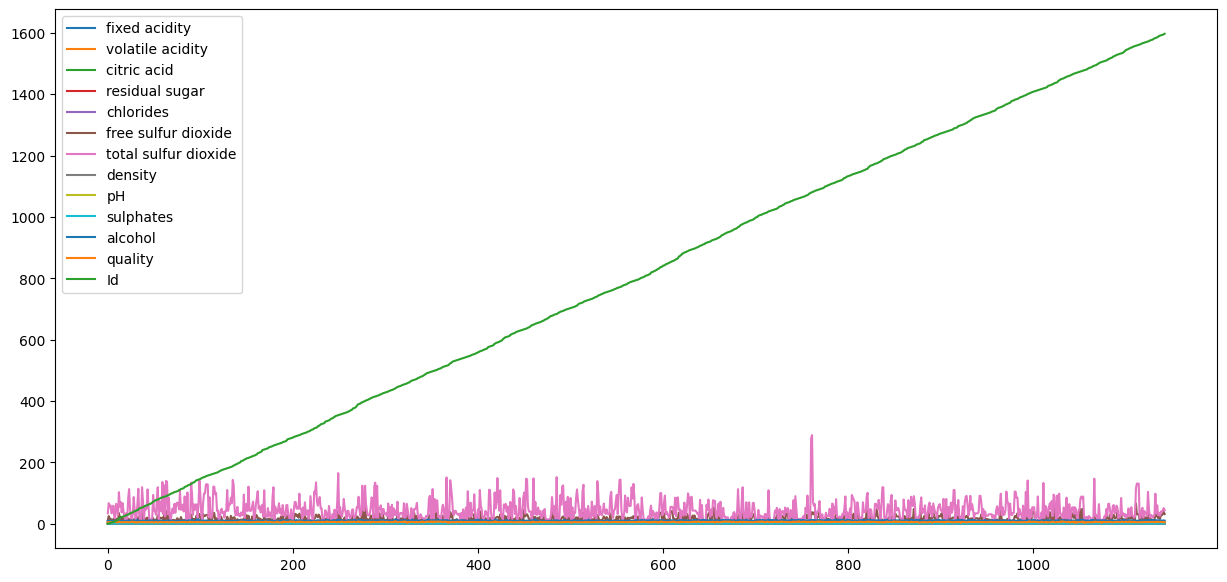

In [132]:
df.plot(figsize=(15,7))

<Axes: xlabel='quality', ylabel='alcohol'>

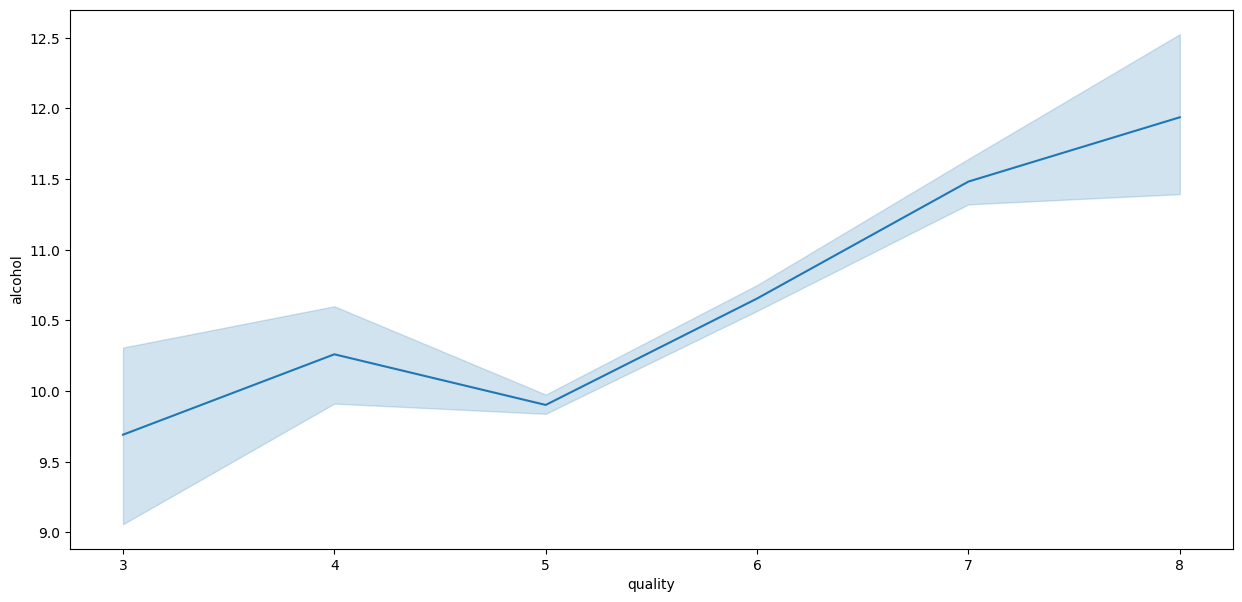

In [133]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="alcohol")

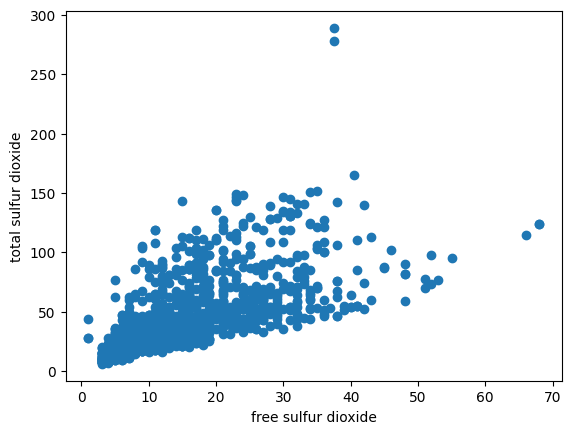

In [134]:
plt.scatter(df["free sulfur dioxide"], df["total sulfur dioxide"])
plt.xlabel("free sulfur dioxide")
plt.ylabel("total sulfur dioxide")
plt.show()

In [135]:
fig = px.pie(df, names='quality', title='Distribution of Wine Quality')
fig.show()

In [136]:
df['total_sulfur_ratio'] = df['free sulfur dioxide'] / df['total sulfur dioxide']

In [137]:
x = df.drop('quality', axis=1)
y = df['quality']

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [139]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(914, 13)
(229, 13)
(914,)
(229,)


In [140]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [141]:
models = {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB()
}

In [142]:
results = {}

In [143]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}: MSE={mse:.4f}, MAE={mae:.4f}, R2={r2:.4f}")
    results[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

Linear Regression: MSE=0.3817, MAE=0.4781, R2=0.3141
Logistic Regression: MSE=0.5852, MAE=0.4978, R2=-0.0515
Decision Tree: MSE=0.5721, MAE=0.4847, R2=-0.0280
Random Forest: MSE=0.3843, MAE=0.3406, R2=0.3094
Support Vector Machine: MSE=0.7904, MAE=0.5983, R2=-0.4204
K-Nearest Neighbors: MSE=0.7817, MAE=0.5983, R2=-0.4047
Gaussian Naive Bayes: MSE=0.6201, MAE=0.4803, R2=-0.1143


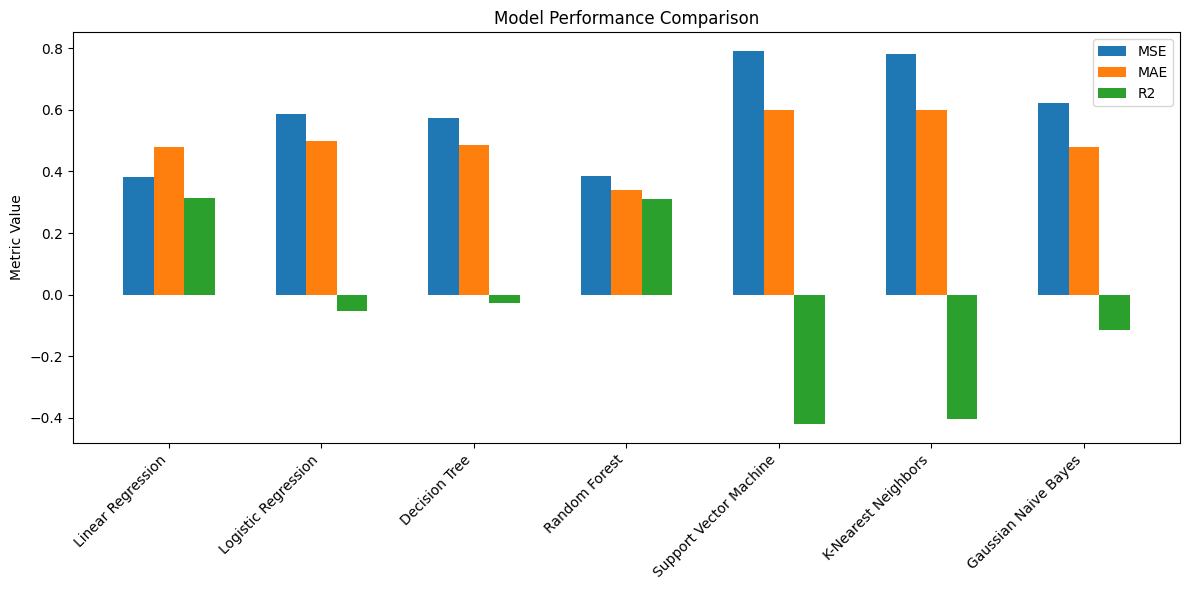

In [144]:
fig, ax = plt.subplots(figsize=(12, 6))

metrics = ['MSE', 'MAE', 'R2']
x_pos = np.arange(len(models))
bar_width = 0.2

for i, metric in enumerate(metrics):
    values = [results[model_name][metric] for model_name in models]
    ax.bar(x_pos + i * bar_width, values, bar_width, label=metric)

ax.set_xticks(x_pos + bar_width)
ax.set_xticklabels(models.keys(), rotation=45, ha='right')
ax.set_ylabel('Metric Value')
ax.set_title('Model Performance Comparison')
ax.legend()
plt.tight_layout()
plt.show()

In [145]:
sample_row = x_test.iloc[[1]]

In [146]:
for model_name, model in models.items():
        prediction = model.predict(sample_row)
        print(f"{model_name} Prediction: {prediction[0]}")

Linear Regression Prediction: 4.720413150569087
Logistic Regression Prediction: 5
Decision Tree Prediction: 6
Random Forest Prediction: 6
Support Vector Machine Prediction: 6
K-Nearest Neighbors Prediction: 5
Gaussian Naive Bayes Prediction: 5


In [147]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    #'Support Vector Machine': {
     #   'model': SVC(),
      #  'param_grid': {
       #     'C': [0.1, 1, 10],
        #    'kernel': ['linear', 'rbf', 'poly'],
         #   'gamma': ['scale', 'auto']
        #}
    #},
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'param_grid': {
           'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'Gaussian Naive Bayes': {
        'model': GaussianNB(),
        'param_grid': {
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        }
    }
}



In [148]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [149]:
for model_name, model_data in models.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(
        model_data['model'],
        model_data['param_grid'],
        cv=kfold,
        scoring='accuracy'
    )
    grid_search.fit(x_train, y_train)

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}\n")

Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for Logistic Regression: 0.5853660001200984

Tuning Decision Tree...
Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best score for Decision Tree: 0.5678376268540202

Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best score for Random Forest: 0.6455173242058488

Tuning K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'weights': 'distance'}
Best score for K-Nearest Neighbors: 0.519672131147541

Tuning Gaussian Naive Bayes...
Best parameters for Gaussian Naive Bayes: {'var_smoothing': 1e-07}
Best score for Gaussian Naive Bayes: 0.5448868071818891



In [150]:
tuned_results = []

In [151]:
for model_name, model_data in models.items():
    print(f"Evaluating {model_name} with tuned hyperparameters...")

    grid_search = GridSearchCV(
        model_data['model'],
        model_data['param_grid'],
        cv=kfold,
        scoring='accuracy'
    )
    grid_search.fit(x_train, y_train)
    tuned_model = model_data['model'].set_params(**grid_search.best_params_)
    tuned_model.fit(x_train, y_train)
    y_pred = tuned_model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")
    print("\n")
    tuned_results.append({
      'model': model_name,
      'MSE': mse,
      'MAE': mae,
      'R2': r2
    })

Evaluating Logistic Regression with tuned hyperparameters...
MSE: 0.4410
MAE: 0.3886
R-squared: 0.2074


Evaluating Decision Tree with tuned hyperparameters...
MSE: 0.4410
MAE: 0.4061
R-squared: 0.2074


Evaluating Random Forest with tuned hyperparameters...
MSE: 0.3930
MAE: 0.3406
R-squared: 0.2937


Evaluating K-Nearest Neighbors with tuned hyperparameters...
MSE: 0.6419
MAE: 0.4847
R-squared: -0.1536


Evaluating Gaussian Naive Bayes with tuned hyperparameters...
MSE: 0.5066
MAE: 0.4279
R-squared: 0.0897




In [152]:
results_df = pd.DataFrame(tuned_results)

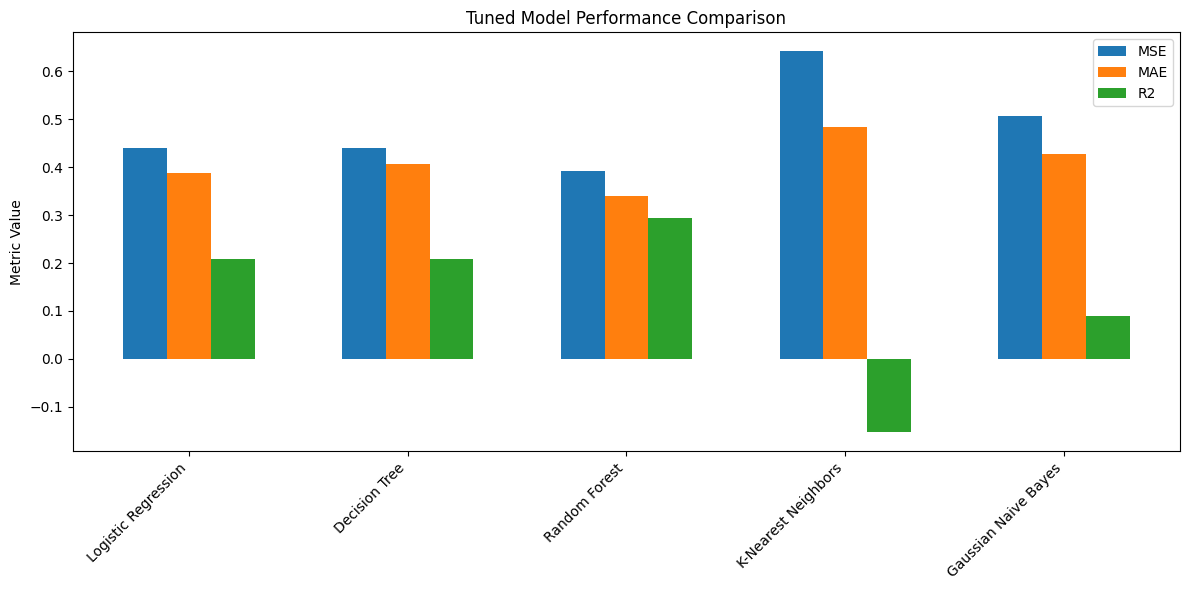

In [153]:
fig, ax = plt.subplots(figsize=(12, 6))

metrics = ['MSE', 'MAE', 'R2']
x_pos = np.arange(len(models))
bar_width = 0.2

for i, metric in enumerate(metrics):
    values = results_df[metric]
    ax.bar(x_pos + i * bar_width, values, bar_width, label=metric)

ax.set_xticks(x_pos + bar_width)
ax.set_xticklabels(results_df['model'], rotation=45, ha='right')
ax.set_ylabel('Metric Value')
ax.set_title('Tuned Model Performance Comparison')
ax.legend()
plt.tight_layout()
plt.show()